# *PROJETO EMPRESA DOCE VENTRE*

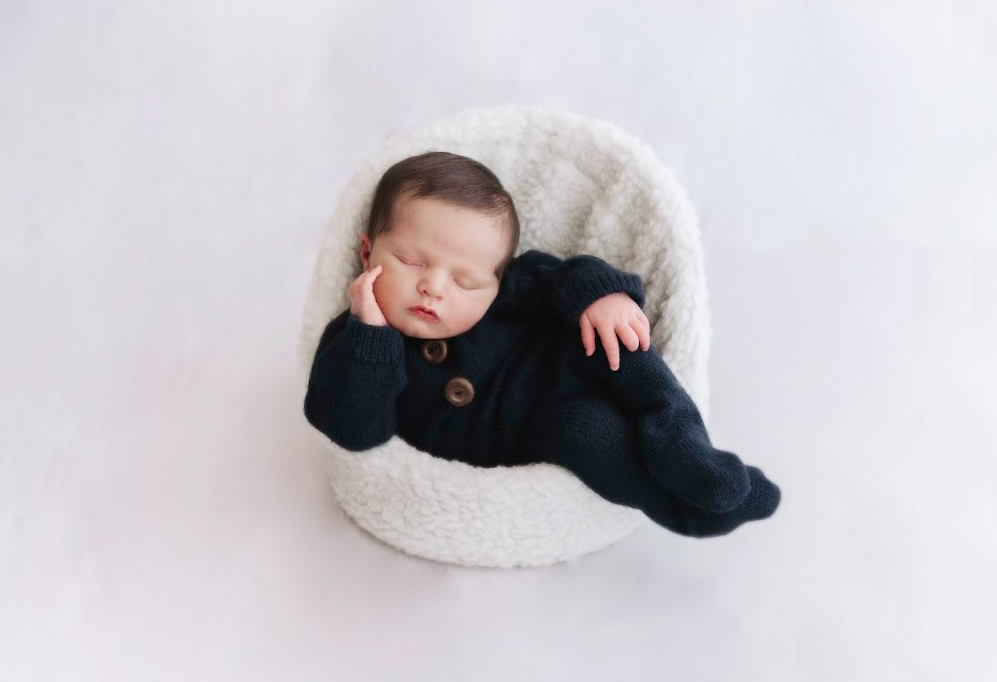

# Problemática: Realizar previsões de vendas baseadas em dados históricos de experiência

# Importando as Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fazendo upload do arquivo CSV

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving novodoceventre_atual.csv to novodoceventre_atual.csv


# Gerando o Dataframe

In [ ]:
df = pd.read_csv("novodoceventre_atual.csv")

# Removendo os valores vazios

In [ ]:
# Remove as linhas que contêm valores NaN em qualquer coluna
df = df.dropna()

# Verifica se ainda existem valores NaN
print(df.isnull().sum())

Nome Contratante        0
Endereço Contratante    0
Descrição do Pacote     0
Dia da Contratação      0
Dia do Serviço          0
Valor                   0
dtype: int64


# Mostrando os primeiros dados

In [ ]:
df.head()

,Nome Contratante,Endereço Contratante,Descrição do Pacote,Dia da Contratação,Dia do Serviço,Valor
0,ANA CAROLINA PEREIRA FONSECA RODRIGUES,TAGUATINGA,COBERTURA FOTOGRAFICA DE PARTO CESÁREA,1/2/2024,4/16/2024,600.0
1,ANA PAULA GOMES EMERICH,VICENTE PIRES,COBERTURA FOTOGRAFICA E FILMAGEM DE PARTO + EN...,7/25/2024,11/10/2024,1399.5
2,ANANDA MEDEIROS OLIVEIRA,CEILÂNDIA,COBERTURA FOTOGRAFICA DE PARTO,6/8/2024,6/12/2024,550.0
3,ANA CAROLINA DE CASTRO FERNANDES,TAGUATINGA,COBERTURA FOTOGRAFICA DE PARTO,9/12/2024,9/15/2024,495.0
4,ANA JÚLIA MARTINS SILVA BRANDÃO,VICENTE PIRES,COBERTURA FOTOGRAFICA E FILMAGEM DE PARTO,7/12/2024,8/17/2024,900.0


# Mostrando os últimos dados

In [ ]:
df.tail()

,Nome Contratante,Endereço Contratante,Descrição do Pacote,Dia da Contratação,Dia do Serviço,Valor
94,GIOVANNA COUTO,CEILÂNDIA,COBERTURA DE FOTOGRAFIA E FILMAGEM DE PARTO,10/3/2024,10/30/2024,1000.0
95,ALANA DIAS,TAGUATINGA,COBERTURA DE FOTOGRAFIA E FILMAGEM DE PARTO,10/3/2024,10/4/2024,1000.0
96,NATHÁSSIA ERICEIRA,AGUAS CLARAS,COBERTURA DE FOTOGRAFIA DE PARTO,10/3/2024,10/10/2024,500.0
97,TIANA FARIAS,SUDOESTE,COBERTURA DE FOTOGRAFIA DE NEWBORN,10/7/2024,10/13/2024,700.0
98,SARA CRISTINA,TAGUATINGA,COBERTURA DE FOTOGRAFIA GESTANTE,10/8/2024,12/14/2024,1620.0


# Variáveis utilizadas

In [ ]:
df.columns

Index(['Nome Contratante', 'Endereço Contratante', 'Descrição do Pacote',
       'Dia da Contratação', 'Dia do Serviço', 'Valor'],
      dtype='object')

# Principais informaçoes do DataSet

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome Contratante      99 non-null     object 
 1   Endereço Contratante  99 non-null     object 
 2   Descrição do Pacote   99 non-null     object 
 3   Dia da Contratação    99 non-null     object 
 4   Dia do Serviço        99 non-null     object 
 5   Valor                 99 non-null     float64
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


# Estatística Descritiva

In [ ]:
df.describe()

,Valor
count,99.000000
mean,885.782828
std,285.698188
min,300.000000
25%,687.500000
50%,1000.000000
75%,1000.000000
max,1850.000000


# Para fins de qualidade do serviço podemos usar a média

### Calcular a média dos preços por pacote

In [ ]:
# Calcular a média dos preços por pacote
media_pacotes = df.groupby('Descrição do Pacote')['Valor'].mean().sort_values()

In [ ]:
media_pacotes.apply(lambda x: f'{x:.2f}')

,Valor
Descrição do Pacote,
COBERTURA FOTOGRAFICA DE LIFESTYLE,320.00
COBERTURA FOTOGRAFICA DE NATAL,360.00
COBERTURA FOTOGRAFICA DE MATERNIDADE,420.00
COBERTURA FOTOGRAFICA DE NEWBORN,450.00
COBERTURA DE FOTOGRAFIA DE NEWBORN,583.33
COBERTURA FOTOGRAFICA DE CASAMENTO CIVIL E RECEPÇÃO,650.00
COBERTURA FOTOGRAFICA DE BATIZADO,650.00
COBERTURA FOTOGRAFICA DE PARTO NORMAL,675.00
COBERTURA FOTOGRAFICA DE FESTA INFANTIL,732.86


# Gráfico com Preço Médio por Pacote

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Calcular a média dos preços por pacote
media_pacotes = df.groupby('Descrição do Pacote')['Valor'].mean().sort_values()

# Criar o gráfico interativo com Plotly usando a paleta Viridis
fig = px.bar(
    media_pacotes,
    x=media_pacotes.values,
    y=media_pacotes.index,
    orientation='h',
    labels={'x': 'Preço Médio (Valor)', 'y': 'Descrição do Pacote'},
    title='Preço médio por pacote',
    color=media_pacotes.values,
    color_continuous_scale=px.colors.sequential.Rainbow_r
)

# Personalizar o gráfico
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    yaxis=dict(tickfont=dict(size=10)),
    coloraxis_colorbar=dict(
        title="Preço Médio",
        tickvals=[media_pacotes.min(), media_pacotes.max()],
        ticktext=["Menor", "Maior"]
)
)
# Exibir o gráfico
fig.show()

# Tratamento dos dados

### Verificando dados duplicados

In [ ]:
# vamos conferir se a base tem ados nulos e duplicados
duplicados = df.duplicated()
duplicados = duplicados.sum()
print(f"O Dataframe tem {duplicados} dados duplicados")

O Dataframe tem 0 dados duplicados


# Novo Dataframe para usar no Modelo de Regressão

In [ ]:
# Remove as linhas que contêm valores NaN em qualquer coluna
df_novo = df.dropna()

# Verifica se ainda existem valores NaN
print(df_novo.isnull().sum())

Nome Contratante        0
Endereço Contratante    0
Descrição do Pacote     0
Dia da Contratação      0
Dia do Serviço          0
Valor                   0
dtype: int64


## Mostrando o novo Dataframe

In [ ]:
df_novo

,Nome Contratante,Endereço Contratante,Descrição do Pacote,Dia da Contratação,Dia do Serviço,Valor
0,ANA CAROLINA PEREIRA FONSECA RODRIGUES,TAGUATINGA,COBERTURA FOTOGRAFICA DE PARTO CESÁREA,1/2/2024,4/16/2024,600.0
1,ANA PAULA GOMES EMERICH,VICENTE PIRES,COBERTURA FOTOGRAFICA E FILMAGEM DE PARTO + EN...,7/25/2024,11/10/2024,1399.5
2,ANANDA MEDEIROS OLIVEIRA,CEILÂNDIA,COBERTURA FOTOGRAFICA DE PARTO,6/8/2024,6/12/2024,550.0
3,ANA CAROLINA DE CASTRO FERNANDES,TAGUATINGA,COBERTURA FOTOGRAFICA DE PARTO,9/12/2024,9/15/2024,495.0
4,ANA JÚLIA MARTINS SILVA BRANDÃO,VICENTE PIRES,COBERTURA FOTOGRAFICA E FILMAGEM DE PARTO,7/12/2024,8/17/2024,900.0
...,...,...,...,...,...,...
94,GIOVANNA COUTO,CEILÂNDIA,COBERTURA DE FOTOGRAFIA E FILMAGEM DE PARTO,10/3/2024,10/30/2024,1000.0
95,ALANA DIAS,TAGUATINGA,COBERTURA DE FOTOGRAFIA E FILMAGEM DE PARTO,10/3/2024,10/4/2024,1000.0
96,NATHÁSSIA ERICEIRA,AGUAS CLARAS,COBERTURA DE FOTOGRAFIA DE PARTO,10/3/2024,10/10/2024,500.0
97,TIANA FARIAS,SUDOESTE,COBERTURA DE FOTOGRAFIA DE NEWBORN,10/7/2024,10/13/2024,700.0


# Gráfico de Arrecadação por Cidade

In [ ]:
# Apresentando um gráfico interativo usando o novo Dataframe df_novo para mostrar as cidades que fecharam mais contratos, demostrando o valor total por cidade

import plotly.express as px

# Agrupa por cidade e soma o valor total dos contratos
valor = df_novo.groupby('Endereço Contratante')['Valor'].sum()


# Ordena as cidades pelo valor total dos contratos em ordem decrescente
cidade_contratos = valor.sort_values(ascending=False)

# Cria o gráfico de barras interativo
fig = px.bar(cidade_contratos,
             x=cidade_contratos.index,
             y='Valor',
             title='Valor Total dos Contratos por Cidade',
             labels={'Valor': 'Valor Total', 'Cidade': 'Cidade'},
             color='Valor',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Cidade', yaxis_title='Arrecadação por localidade')

# Mostra o gráfico
fig.show()

# Gráfico com os Dados Históricos para ser usado como base

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Certificar-se de que a coluna de datas está no formato datetime
df_novo['Dia da Contratação'] = pd.to_datetime(df_novo['Dia da Contratação'])

# Criar a coluna 'Month'
df_novo['Month'] = df_novo['Dia da Contratação'].dt.to_period('M')

# Agrupar por mês e somar os valores
monthly_values = df_novo.groupby('Month')['Valor'].sum()

# Criar o gráfico interativo
fig = px.line(
    x=monthly_values.index.astype(str),  # Convert PeriodIndex to string for plotting
    y=monthly_values.values,
    title='Valor por Mês',
    labels={'x': 'Mês', 'y': 'Valor Total'}
)

# Adicionar pontos marcando as principais mudanças (picos e vales)
fig.add_trace(go.Scatter(
    x=monthly_values.index.astype(str),
    y=monthly_values.values,
    mode='markers+lines',
    name='Picos de Mudança',
    marker=dict(color='purple', size=8, symbol='circle')
))

# Personalizar o layout do gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='rgba(0,0,0,0)',  # fundo transparente
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    yaxis=dict(tickfont=dict(size=12))
)

# Exibir o gráfico
fig.show()

# Treinamento do Modelo usando Regressão Linear

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Certificar-se de que a coluna de datas está no formato datetime
df_novo['Dia da Contratação'] = pd.to_datetime(df_novo['Dia da Contratação'])

# Criar a coluna 'Month'
df_novo['Month'] = df_novo['Dia da Contratação'].dt.to_period('M')

# Agrupar por mês e somar os valores
monthly_values = df_novo.groupby('Month')['Valor'].sum()

# Convertendo o PeriodIndex para datetime para manipulação
monthly_values.index = monthly_values.index.to_timestamp()

# Criando a feature (X) e o target (y)
# Converting the TimedeltaIndex to a NumPy array before reshaping
X = np.array((monthly_values.index - monthly_values.index[0]).days).reshape(-1, 1)
y = monthly_values.values

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 67% de dados de treino
X_train

array([[  0],
       [ 31],
       [ 61],
       [ 92],
       [122],
       [153],
       [184],
       [213],
       [244],
       [274],
       [305],
       [335]])

In [ ]:
# 33% de dados de teste
X_test

array([[366],
       [397],
       [427]])

In [ ]:
# 67% (o que eu prever ) - y ( rótulos ou classes)
y_train

array([ 800. , 2000. , 1000. , 2360. , 2000. , 8625. , 1850. , 6655. ,
       4800. , 5430. , 2900. , 5434.5])

In [ ]:
# 33 % ( o que eu quero prever) - y ( rótulos ou classes)
y_test

array([ 6958., 15280., 21600.])

# Apresentação do Gráfico com Regressão Linear

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Coluna de datas no formato datetime
df_novo['Dia da Contratação'] = pd.to_datetime(df_novo['Dia da Contratação'])

# Criar a coluna 'Month' using 'M' for monthly frequency
df_novo['Month'] = df_novo['Dia da Contratação'].dt.to_period('M')

# Agrupar por mês e somar os valores
monthly_values = df_novo.groupby('Month')['Valor'].sum()

# Convertendo o PeriodIndex para datetime para manipulação
monthly_values.index = monthly_values.index.to_timestamp()

# Criando a feature (X) e o target (y)
X = np.array((monthly_values.index - monthly_values.index[0]).days).reshape(-1, 1)
y = monthly_values.values

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Criando datas futuras para previsão (próximos 6 meses)
future_dates = pd.date_range(start=monthly_values.index[-1], periods=7, freq='ME')[1:]  # 'ME'

# Convertendo para o formato necessário para previsão
# Convertendo o TimedeltaIndex em um array NumPy
future_X = np.array((future_dates - monthly_values.index[0]).days).reshape(-1, 1)

# Fazendo as previsões
future_predictions = model.predict(future_X)

# Criar o gráfico interativo
fig = go.Figure()

# Adicionar a série temporal dos valores mensais
fig.add_trace(go.Scatter(
    x=monthly_values.index,
    y=monthly_values.values,
    mode='lines+markers',
    name='Dados Históricos'
))

# Adicionar as previsões futuras e conectar com linha contínua
all_dates = np.concatenate((monthly_values.index, future_dates))
all_values = np.concatenate((monthly_values.values, future_predictions))

fig.add_trace(go.Scatter(
    x=all_dates,
    y=all_values,
    mode='lines+markers',
    name='Previsões Futuras',
    line=dict(dash='solid')
))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Previsão de Valores para os Próximos Meses',
    xaxis_title='Data',
    yaxis_title='Valor Total',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    yaxis=dict(tickfont=dict(size=12))
)

# Exibir o gráfico
fig.show()

# Apresentação do Gráfico com Regressão Polinomial

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# Certificar-se de que a coluna de datas está no formato datetime
df_novo['Dia da Contratação'] = pd.to_datetime(df_novo['Dia da Contratação'])

# Criar a coluna 'Month' usando a frequência mensal
df_novo['Month'] = df_novo['Dia da Contratação'].dt.to_period('M')

# Agrupar por mês e somar os valores
monthly_values = df_novo.groupby('Month')['Valor'].sum()

# Convertendo o PeriodIndex para datetime para manipulação
monthly_values.index = monthly_values.index.to_timestamp()

# Criando a feature (X) e o target (y)
X = np.array((monthly_values.index - monthly_values.index[0]).days).reshape(-1, 1)
y = monthly_values.values

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar features polinomiais
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Criar e treinar o modelo de regressão linear com features polinomiais
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Criando datas futuras para previsão (próximos 6 meses)
future_dates = pd.date_range(start=monthly_values.index[-1], periods=7, freq='ME')[1:]

# Convertendo para o formato necessário para previsão
future_X = np.array((future_dates - monthly_values.index[0]).days).reshape(-1, 1)
future_X_poly = poly.transform(future_X)

# Fazendo as previsões
future_predictions = model.predict(future_X_poly)

# Criar o gráfico interativo
fig = go.Figure()

# Adicionar a série temporal dos valores mensais
fig.add_trace(go.Scatter(
    x=monthly_values.index,
    y=monthly_values.values,
    mode='lines+markers',
    name='Dados Históricos'
))

# Adicionar as previsões futuras e conectar com linha contínua
all_dates = np.concatenate((monthly_values.index, future_dates))
all_values = np.concatenate((monthly_values.values, future_predictions))

fig.add_trace(go.Scatter(
    x=all_dates,
    y=all_values,
    mode='lines+markers',
    name='Previsões Futuras',
    line=dict(dash='solid')
))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Previsão de Valores para os Próximos Meses com Regressão Polinomial',
    xaxis_title='Data',
    yaxis_title='Valor Total',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    yaxis=dict(tickfont=dict(size=12))
)

# Exibir o gráfico
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# Certificar-se de que a coluna de datas está no formato datetime
df_novo['Dia da Contratação'] = pd.to_datetime(df_novo['Dia da Contratação'])

# Criar a coluna 'Month' usando a frequência mensal
df_novo['Month'] = df_novo['Dia da Contratação'].dt.to_period('M')

# Agrupar por mês e somar os valores
monthly_values = df_novo.groupby('Month')['Valor'].sum()

# Convertendo o PeriodIndex para datetime para manipulação
monthly_values.index = monthly_values.index.to_timestamp()

# Criando a feature (X) e o target (y)
X = np.array((monthly_values.index - monthly_values.index[0]).days).reshape(-1, 1)
y = monthly_values.values

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ===== Modelo Linear =====
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# ===== Modelo Polinomial =====
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# ===== Combinação dos Modelos =====
# Comparar os erros nos dados de teste
linear_mse = mean_squared_error(y_test, y_pred_linear)
poly_mse = mean_squared_error(y_test, y_pred_poly)

# Média ponderada baseada no inverso dos erros
weight_linear = 1 / linear_mse
weight_poly = 1 / poly_mse

# Normalizar os pesos
total_weight = weight_linear + weight_poly
weight_linear /= total_weight
weight_poly /= total_weight

# Criando datas futuras para previsão (próximos 6 meses)
future_dates = pd.date_range(start=monthly_values.index[-1], periods=7, freq='ME')[1:]
future_X = np.array((future_dates - monthly_values.index[0]).days).reshape(-1, 1)

# Previsões individuais
future_predictions_linear = linear_model.predict(future_X)
future_X_poly = poly.transform(future_X)
future_predictions_poly = poly_model.predict(future_X_poly)

# Combinação ponderada das previsões
future_predictions_combined = (
    weight_linear * future_predictions_linear +
    weight_poly * future_predictions_poly
)

# ===== Visualização =====
fig = go.Figure()

# Adicionar a série temporal dos valores mensais
fig.add_trace(go.Scatter(
    x=monthly_values.index,
    y=monthly_values.values,
    mode='lines+markers',
    name='Dados Históricos'
))

# Adicionar as previsões futuras do modelo combinado
all_dates = np.concatenate((monthly_values.index, future_dates))
all_values_combined = np.concatenate((monthly_values.values, future_predictions_combined))

fig.add_trace(go.Scatter(
    x=all_dates,
    y=all_values_combined,
    mode='lines+markers',
    name='Previsões Futuras (Modelo Combinado)',
    line=dict(dash='solid')
))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Previsão de Valores para os Próximos Meses (Modelo Combinado)',
    xaxis_title='Data',
    yaxis_title='Valor Total',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    yaxis=dict(tickfont=dict(size=12))
)

# Exibir o gráfico
fig.show()
